# keras API

## preprocessing

In [9]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
import h5py 

In [ ]:
train_set = h5py.File("../datasets/train_signs.h5","r")
test_set = h5py.File("../datasets/test_signs.h5","r")

In [ ]:
# x_train = tf.data.Dataset.from_tensor_slices(train_set["train_set_x"])
# y_train = tf.data.Dataset.from_tensor_slices(train_set["train_set_y"])
# x_test = tf.data.Dataset.from_tensor_slices(test_set["test_set_x"])
# y_test = tf.data.Dataset.from_tensor_slices(test_set["test_set_y"])

x_train = np.array(train_set["train_set_x"])
y_train = np.array(train_set["train_set_y"])
x_test = np.array(test_set["test_set_x"])
y_test = np.array(test_set["test_set_y"])

In [60]:
#print("data point species: "+str(x_train.element_spec) , "size of tarin set:"+str(x_train.cardinality().numpy()),"size of test set:"+str(x_test.cardinality().numpy()),sep="\n")
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape , sep="\n")

(13176, 10000)
(1464, 10000)
(13176, 3)
(1464, 3)


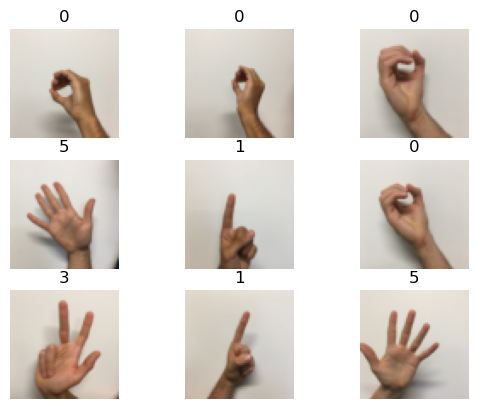

In [ ]:
# iter_x_test = iter(x_test)
# iter_y_test = iter(y_test)
for i in range(9):
    plt.subplot(3,3,i+1)
    # plt.imshow(next(iter_x_test))
    # plt.title(next(iter_y_test).numpy())
    plt.imshow(x_test[i])
    plt.title(y_test[i])
    plt.axis("off")

In [ ]:
x_train_scaled = x_train/255. #.map(tf.image.per_image_standardization)
x_test_scaled = x_test/255. #.map(tf.image.per_image_standardization)

# x_train_scaled = tf.image.per_image_standardization(x_train)
# x_test_scaled = tf.image.per_image_standardization(x_test)

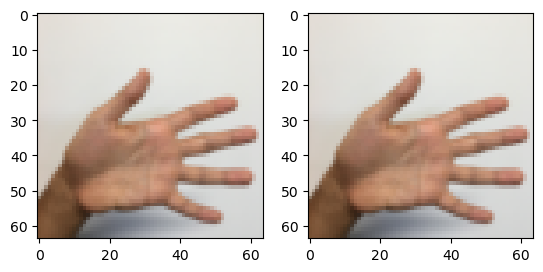

In [ ]:
#  these image will be diffrent if we use tf.image for standardization 
plt.subplot(1,2,1)
plt.imshow(x_train[0])
plt.subplot(1,2,2)
plt.imshow(x_train_scaled[0])

## modelling 

In [ ]:
model_simple = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64,64,3),name="flatten_0"),
    tf.keras.layers.Dense(128,activation="leaky_relu",name="dense_1"),
    tf.keras.layers.Dense(64,activation="leaky_relu",name="dense_2"),
    tf.keras.layers.Dense(32,activation="leaky_relu",name="dense_3"),
    tf.keras.layers.Dense(16,activation="leaky_relu",name="dense_4"),
    tf.keras.layers.Dense(8,activation="leaky_relu",name="dense_5"),
    tf.keras.layers.Dense(6,name="dense_6_last_layer")
])

In [ ]:
model_simple(tf.expand_dims(x_train[0],axis=0))

<tf.Tensor: shape=(1, 6), dtype=float32, numpy=
array([[ 143.9533   ,    3.1528025,  -70.23472  , -114.33552  ,
          -7.01162  ,   22.284328 ]], dtype=float32)>

In [ ]:
prediction = model_simple(tf.expand_dims(x_train_scaled[0],axis=0))
print(prediction)

tf.Tensor([[ 0.5645228   0.0123639  -0.27543032 -0.44837448 -0.0274964   0.08738964]], shape=(1, 6), dtype=float32)


In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
loss(y_train[0],prediction)

<tf.Tensor: shape=(), dtype=float32, numpy=1.7424937>

In [ ]:
model_simple.compile(
    optimizer = "adam",
    loss = loss , 
    metrics = ["accuracy"]
)

In [ ]:
model_simple.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_0 (Flatten)         (None, 12288)             0         
                                                                 
 dense_1 (Dense)             (None, 128)               1572992   
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6_last_layer (Dense)  (None, 6)                 5

In [ ]:
# train_set_zip = tf.data.Dataset.zip(x_train_scaled,y_train)
# test_set_zip = tf.data.Dataset.zip(x_test_scaled,y_test)

In [ ]:
# x_train_numpy = np.array([i.numpy() for i in iter(x_train_scaled)])
# y_train_numpy = np.array([i.numpy() for i in iter(y_train)])
# x_test_numpy = np.array([i.numpy() for i in iter(x_test_scaled)])
# y_test_numpy = np.array([i.numpy() for i in iter(y_test)])


In [ ]:
model_simple_summury = model_simple.fit(x_train_scaled,y_train,epochs=200,batch_size=32,validation_data=(x_test_scaled,y_test),verbose=False)

In [ ]:
model_simple_summury.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

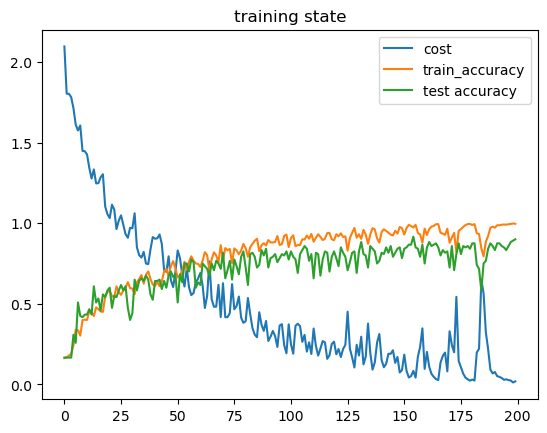

In [ ]:
plt.plot(model_simple_summury.history['loss'] , label = "cost")
plt.plot(model_simple_summury.history['accuracy'] , label = "train_accuracy")
plt.plot(model_simple_summury.history['val_accuracy'] , label = "test accuracy")
plt.title("training state")
plt.legend()

In [ ]:
model_simple.evaluate(x_test_scaled,y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.5305 - accuracy: 0.9000


[0.530471920967102, 0.8999999761581421]

In [ ]:
predictions_logits = model_simple.predict(x_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [ ]:
model_simple_probility = tf.keras.Sequential([
    model_simple,
    tf.keras.layers.Softmax()
])

In [ ]:
predictions_probility = model_simple_probility.predict(x_test_scaled)

4/4 [==============================] - 0s 4ms/step


In [ ]:
y_hat = np.argmax(predictions_probility,axis=1)

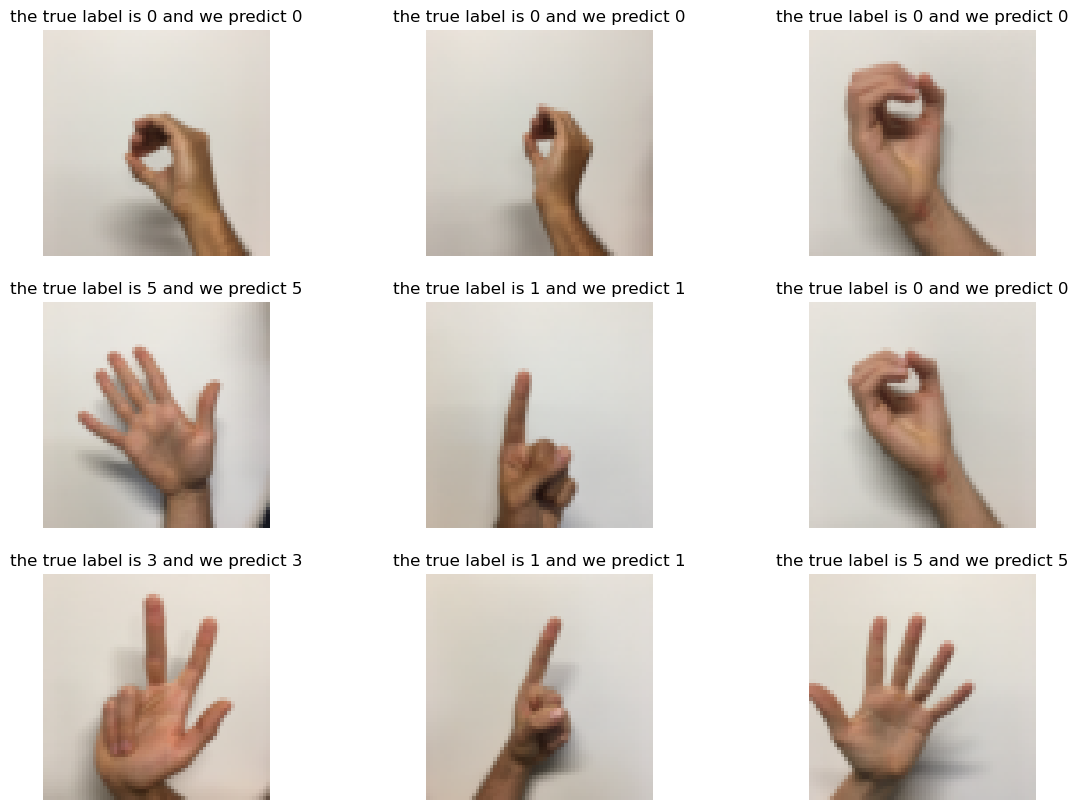

In [ ]:
plt.figure(figsize=(14,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i])
    plt.title("the true label is "+str(y_test[i])+" and we predict "+str(y_hat[i]))
    plt.axis("off")

# regularization and dropout 

In [ ]:
# # synthetic classification dataset
# from sklearn.datasets import make_classification
# # define dataset
# X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# # summarize the dataset
# print(X.shape, y.shape)

(10000, 20) (10000,)


In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ARMA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from nltk.corpus import stopwords
def remove_stopwords(input_text):
    '''
    Function to remove English stopwords from a Pandas Series.
    
    Parameters:
        input_text : text to clean
    Output:
        cleaned Pandas Series 
    '''
    stopwords_list = stopwords.words('english')
    # Some words which might indicate a certain sentiment are kept via a whitelist
    whitelist = ["n't", "not", "no"]
    words = input_text.split() 
    clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
    return " ".join(clean_words) 
    
def remove_mentions(input_text):
    '''
    Function to remove mentions, preceded by @, in a Pandas Series
    
    Parameters:
        input_text : text to clean
    Output:
        cleaned Pandas Series 
    '''
    return re.sub(r'@\w+', '', input_text)

In [14]:
import pandas as pd 
import re
#from nltk.corpus import stopwords
df = pd.read_csv("../datasets/Tweets.csv")
df = df.reindex(np.random.permutation(df.index))
df = df[["text","airline_sentiment"]]
df.text = df.text.apply(remove_stopwords)
df.text = df.text.apply(remove_mentions)


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train , x_test  , y_train , y_test =  train_test_split(df.text, df.airline_sentiment, test_size=0.1, random_state=37)
#X_train, X_test, y_train, y_test = train_test_split(df.text, df.airline_sentiment, test_size=0.1, random_state=37)
#train_test_split(X,y,test_size=0.3)

In [17]:
x_train.shape , type(x_train) , y_test.shape 

((13176,), pandas.core.series.Series, (1464,))

In [18]:
from keras.preprocessing.text import Tokenizer

In [20]:
NB_WORDS = 10000
tk = Tokenizer(num_words=NB_WORDS,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{"}~\t\n',
               lower=True,
               char_level=False,
               split=' ')
tk.fit_on_texts(x_train)

In [21]:
X_train = tk.texts_to_matrix(x_train, mode='binary')
X_test = tk.texts_to_matrix(x_test, mode='binary')

In [26]:
from keras.utils import to_categorical

In [28]:
#from tensorflow.keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train = to_categorical(y_train_le)
y_test = to_categorical(y_test_le)

In [29]:
x_train = X_train
x_test = X_test

In [35]:
y_train.shape

(13176, 3)

## small model

In [53]:
small_model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation = "relu"),
    tf.keras.layers.Dense(3)
])

In [54]:
small_model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics = ["accuracy"]
)

In [55]:
history_dict = {}
history_dict["small"] = small_model.fit(x_train , y_train , epochs= 50 , verbose=False, batch_size= 128 , validation_data=(x_test,y_test))

## medium model 

In [39]:
medium_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation = "relu"),
    tf.keras.layers.Dense(32,activation = "relu"),
    tf.keras.layers.Dense(32,activation = "relu"),
    tf.keras.layers.Dense(32,activation = "relu"),
    tf.keras.layers.Dense(3)
])

In [40]:
medium_model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics = ["accuracy"]
)

In [41]:
history_dict = {}
history_dict["medium"] = small_model.fit(x_train , y_train , epochs= 50 , verbose=False, batch_size= 128 , validation_data=(x_test,y_test))

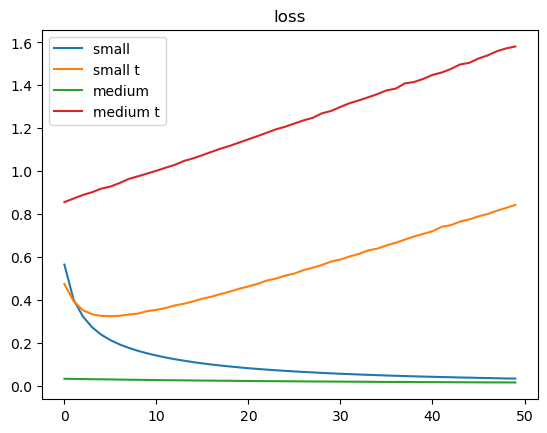

In [44]:
plt.plot(history_dict["small"].history["loss"],label="small ")
plt.plot(history_dict["small"].history["val_loss"],label="small t")
plt.plot(history_dict["medium"].history["loss"],label="medium")
plt.plot(history_dict["medium"].history["val_loss"],label="medium t")
plt.title("loss")
plt.legend()


## apply dropout and generalization 

In [56]:
small_model_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation = "relu",kernel_regularizer=tf.keras.regularizers.l2(0.001) ),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3)
])

In [57]:
small_model_reg.compile(
    optimizer = "adam",
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics = ["accuracy"]
)

In [58]:
#history_dict = {}
history_dict["small_model_reg"] = small_model_reg.fit(x_train , y_train , epochs= 50 , verbose=False, batch_size= 128 , validation_data=(x_test,y_test))

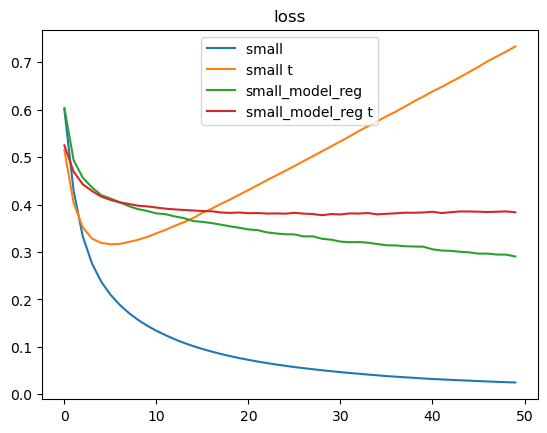

In [59]:
plt.plot(history_dict["small"].history["loss"],label="small ")
plt.plot(history_dict["small"].history["val_loss"],label="small t")
plt.plot(history_dict["small_model_reg"].history["loss"],label="small_model_reg")
plt.plot(history_dict["small_model_reg"].history["val_loss"],label="small_model_reg t")
plt.title("loss")
plt.legend()


as you can see the regularization reduce variance  